In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10],parse_dates=['date'], skipinitialspace=True)
df 

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1761,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1762,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1763,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm25              1706 non-null   float64       
 2   pm10              1764 non-null   float64       
 3   o3                1701 non-null   float64       
 4   no2               1454 non-null   float64       
 5   co                1247 non-null   float64       
 6   avgT              1695 non-null   float64       
 7   humid             1765 non-null   float64       
 8   pressure-monthly  1765 non-null   float64       
 9   windDir           1735 non-null   float64       
 10  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 151.8 KB


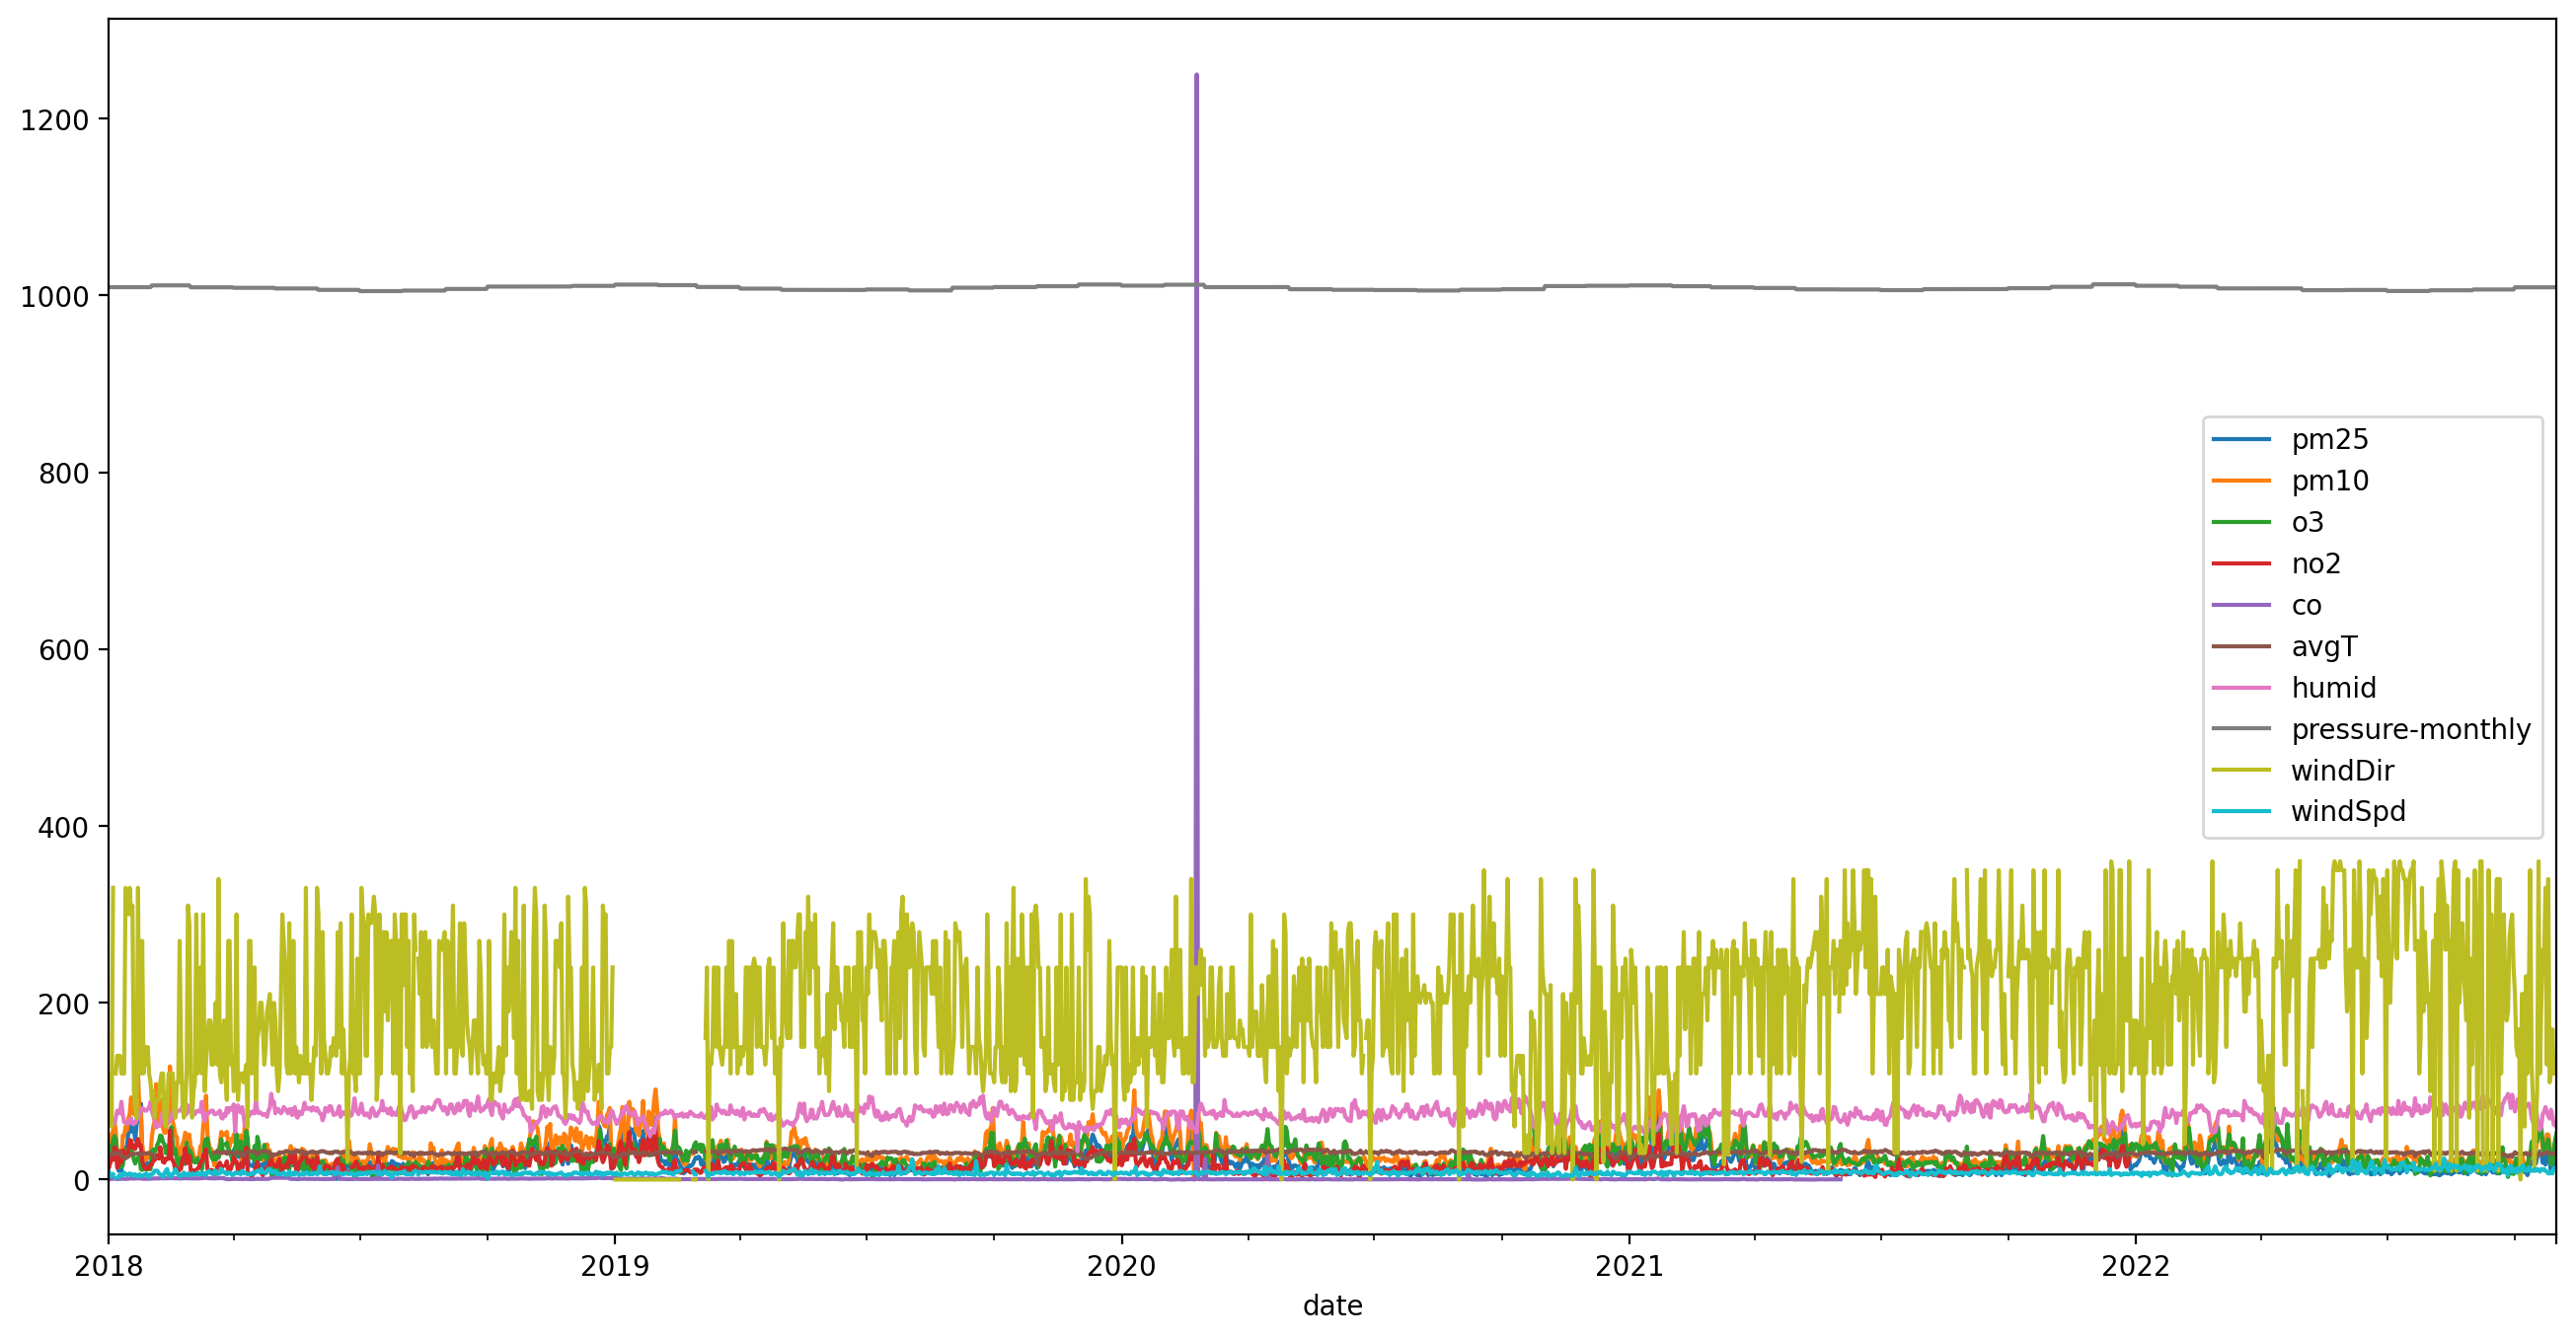

In [5]:
df.set_index('date').plot(figsize=(16, 8));

In [6]:
data = df.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1761,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1762,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1763,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [7]:
y_col = 'pm25'

In [8]:
data.dropna(subset=[y_col], inplace=True)
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1761,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1762,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1763,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [9]:
df = data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
0,2018-01-01,21.0
1,2018-01-02,26.0
2,2018-01-03,38.0
3,2018-01-04,39.0
4,2018-01-05,51.0
...,...,...
1760,2022-10-27,8.0
1761,2022-10-28,11.0
1762,2022-10-29,12.0
1763,2022-10-30,23.0


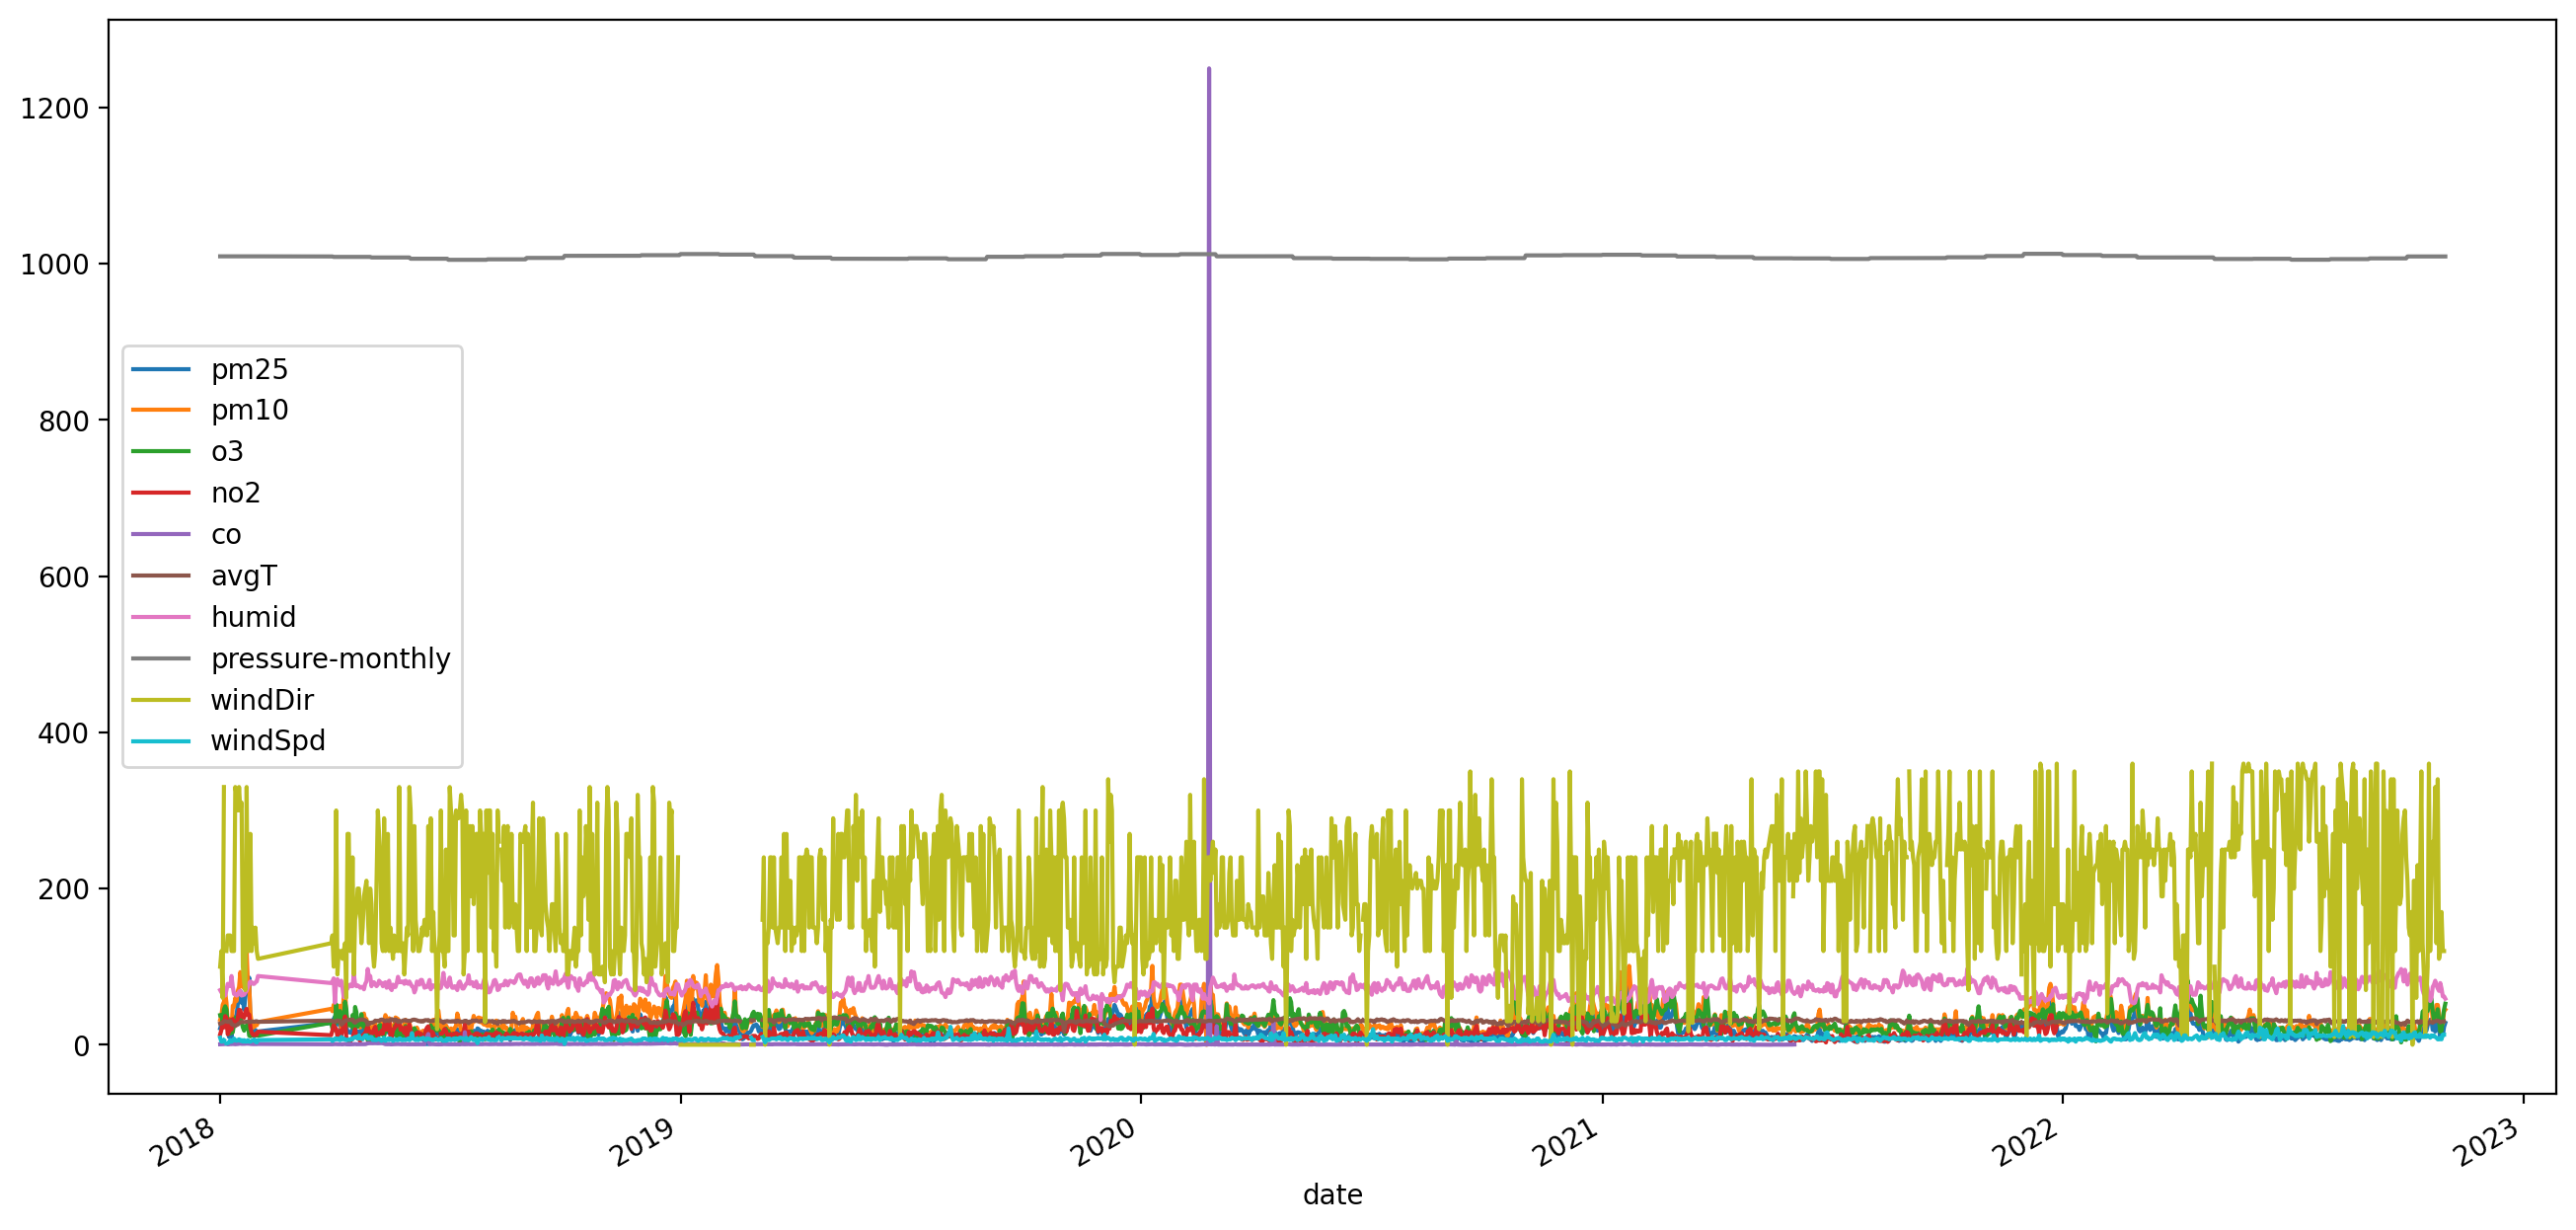

In [10]:
data.set_index('date').plot(figsize=(16, 8));

In [11]:
model=Prophet()

In [12]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7fd7722e1ee0>}

In [13]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_1_piwme/at_tn_b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_1_piwme/lwpvzp5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51781', 'data', 'file=/tmp/tmp_1_piwme/at_tn_b6.json', 'init=/tmp/tmp_1_piwme/lwpvzp5x.json', 'output', 'file=/tmp/tmp_1_piwme/prophet_model79nlpto7/prophet_model-20230405103723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:37:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
df.tail()

,ds,y
1760,2022-10-27,8.0
1761,2022-10-28,11.0
1762,2022-10-29,12.0
1763,2022-10-30,23.0
1764,2022-10-31,28.0


In [15]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

,ds
1881,2023-04-25
1882,2023-04-26
1883,2023-04-27
1884,2023-04-28
1885,2023-04-29


In [16]:
future.head()

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [17]:
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,21.043665,21.101704,43.083119,21.043665,21.043665,11.136485,11.136485,11.136485,0.197880,0.197880,0.197880,10.938605,10.938605,10.938605,0.0,0.0,0.0,32.180150
1,2018-01-02,21.043657,21.729137,43.620115,21.043657,21.043657,11.366224,11.366224,11.366224,0.249218,0.249218,0.249218,11.117006,11.117006,11.117006,0.0,0.0,0.0,32.409881
2,2018-01-03,21.043649,21.967118,43.784649,21.043649,21.043649,12.029120,12.029120,12.029120,0.641378,0.641378,0.641378,11.387742,11.387742,11.387742,0.0,0.0,0.0,33.072769
3,2018-01-04,21.043641,21.945860,43.135724,21.043641,21.043641,11.621372,11.621372,11.621372,-0.127521,-0.127521,-0.127521,11.748893,11.748893,11.748893,0.0,0.0,0.0,32.665013
4,2018-01-05,21.043633,22.188711,44.463715,21.043633,21.043633,12.396359,12.396359,12.396359,0.200544,0.200544,0.200544,12.195816,12.195816,12.195816,0.0,0.0,0.0,33.439993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,2023-04-25,18.753629,3.706456,25.100679,18.597572,18.891322,-3.687783,-3.687783,-3.687783,0.249218,0.249218,0.249218,-3.937000,-3.937000,-3.937000,0.0,0.0,0.0,15.065846
1882,2023-04-26,18.757073,3.793437,25.951151,18.599828,18.896027,-3.555710,-3.555710,-3.555710,0.641378,0.641378,0.641378,-4.197088,-4.197088,-4.197088,0.0,0.0,0.0,15.201363
1883,2023-04-27,18.760517,2.594284,24.584713,18.601578,18.900530,-4.525545,-4.525545,-4.525545,-0.127521,-0.127521,-0.127521,-4.398024,-4.398024,-4.398024,0.0,0.0,0.0,14.234972
1884,2023-04-28,18.763961,3.637103,25.488286,18.603279,18.905034,-4.339591,-4.339591,-4.339591,0.200544,0.200544,0.200544,-4.540135,-4.540135,-4.540135,0.0,0.0,0.0,14.424370


In [19]:
df

,ds,y
0,2018-01-01,21.0
1,2018-01-02,26.0
2,2018-01-03,38.0
3,2018-01-04,39.0
4,2018-01-05,51.0
...,...,...
1760,2022-10-27,8.0
1761,2022-10-28,11.0
1762,2022-10-29,12.0
1763,2022-10-30,23.0


In [20]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,32.180150,21.101704,43.083119
1,2018-01-02,32.409881,21.729137,43.620115
2,2018-01-03,33.072769,21.967118,43.784649
3,2018-01-04,32.665013,21.945860,43.135724
4,2018-01-05,33.439993,22.188711,44.463715
...,...,...,...,...
1881,2023-04-25,15.065846,3.706456,25.100679
1882,2023-04-26,15.201363,3.793437,25.951151
1883,2023-04-27,14.234972,2.594284,24.584713
1884,2023-04-28,14.424370,3.637103,25.488286


In [21]:
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2018-01-01,21.0,32.180150,21.101704,43.083119
1,2018-01-02,26.0,32.409881,21.729137,43.620115
2,2018-01-03,38.0,33.072769,21.967118,43.784649
3,2018-01-04,39.0,32.665013,21.945860,43.135724
4,2018-01-05,51.0,33.439993,22.188711,44.463715
...,...,...,...,...,...
1701,2022-10-27,8.0,18.995672,7.503694,29.341258
1702,2022-10-28,11.0,19.989670,8.742029,30.453239
1703,2022-10-29,12.0,19.980121,9.197443,30.442156
1704,2022-10-30,23.0,20.372640,10.176159,31.216577


In [22]:
dt.shape

(1706, 5)

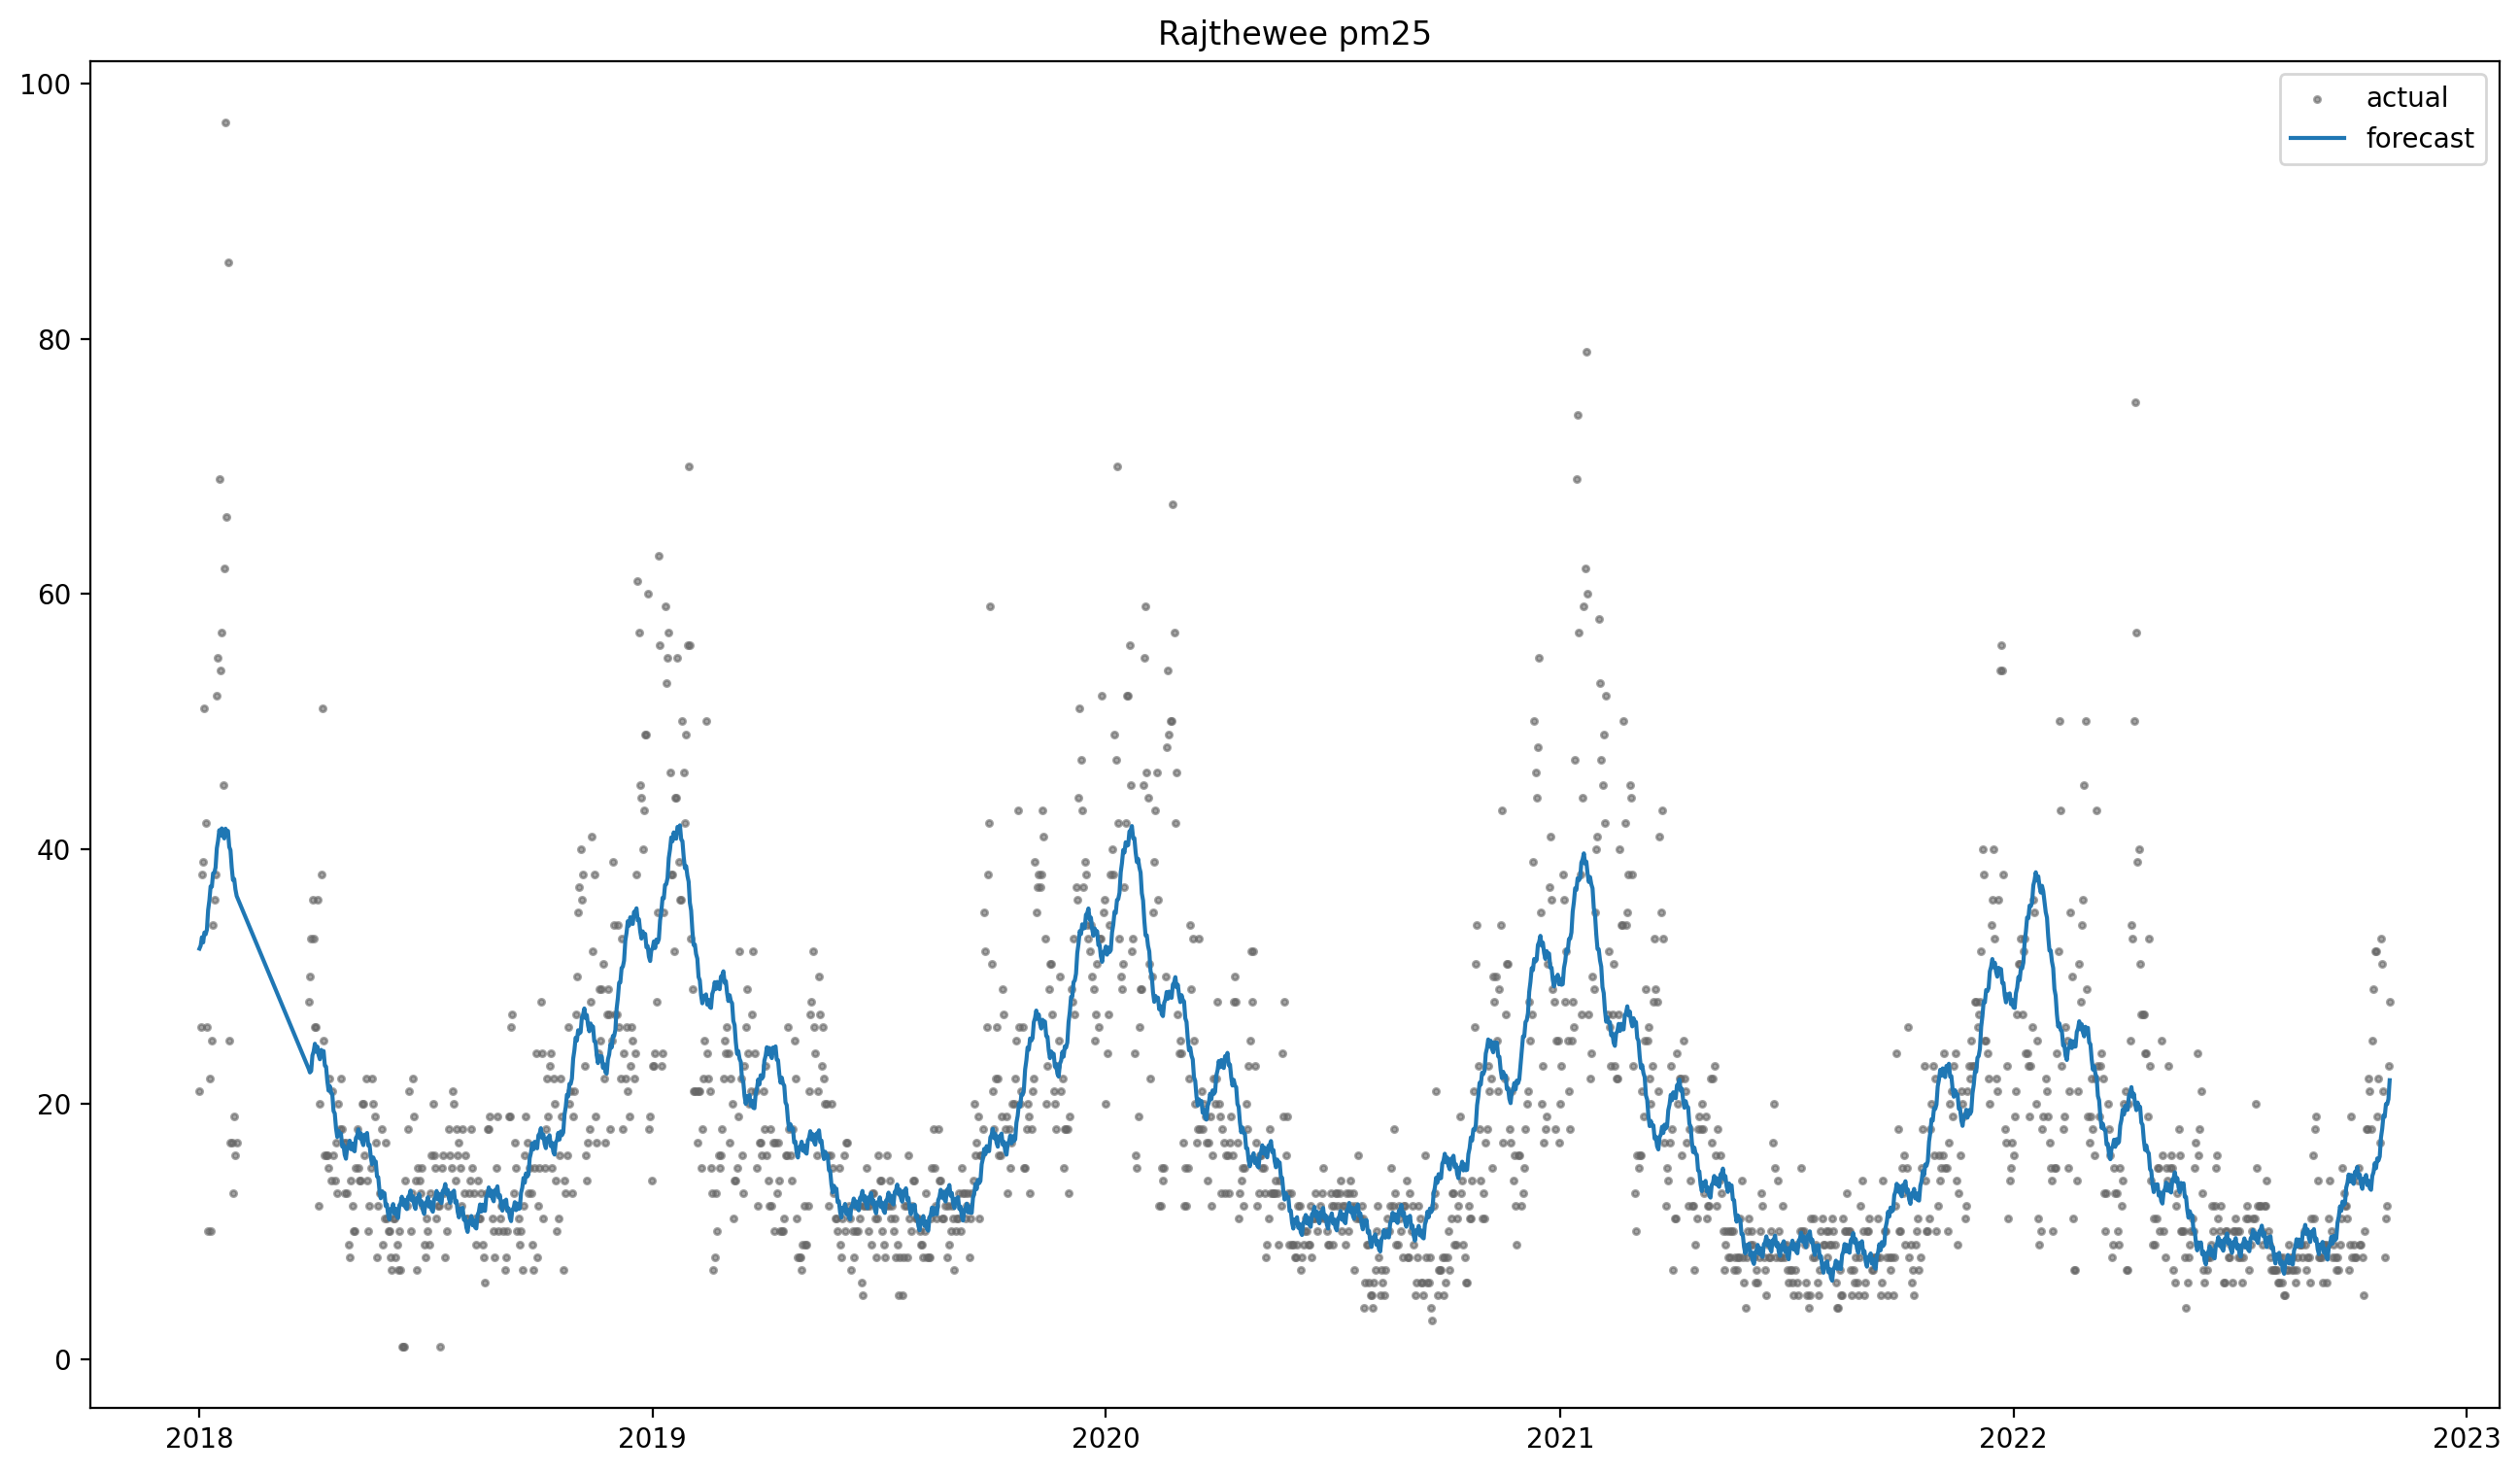

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Rajthewee {y_col}')
plt.legend();

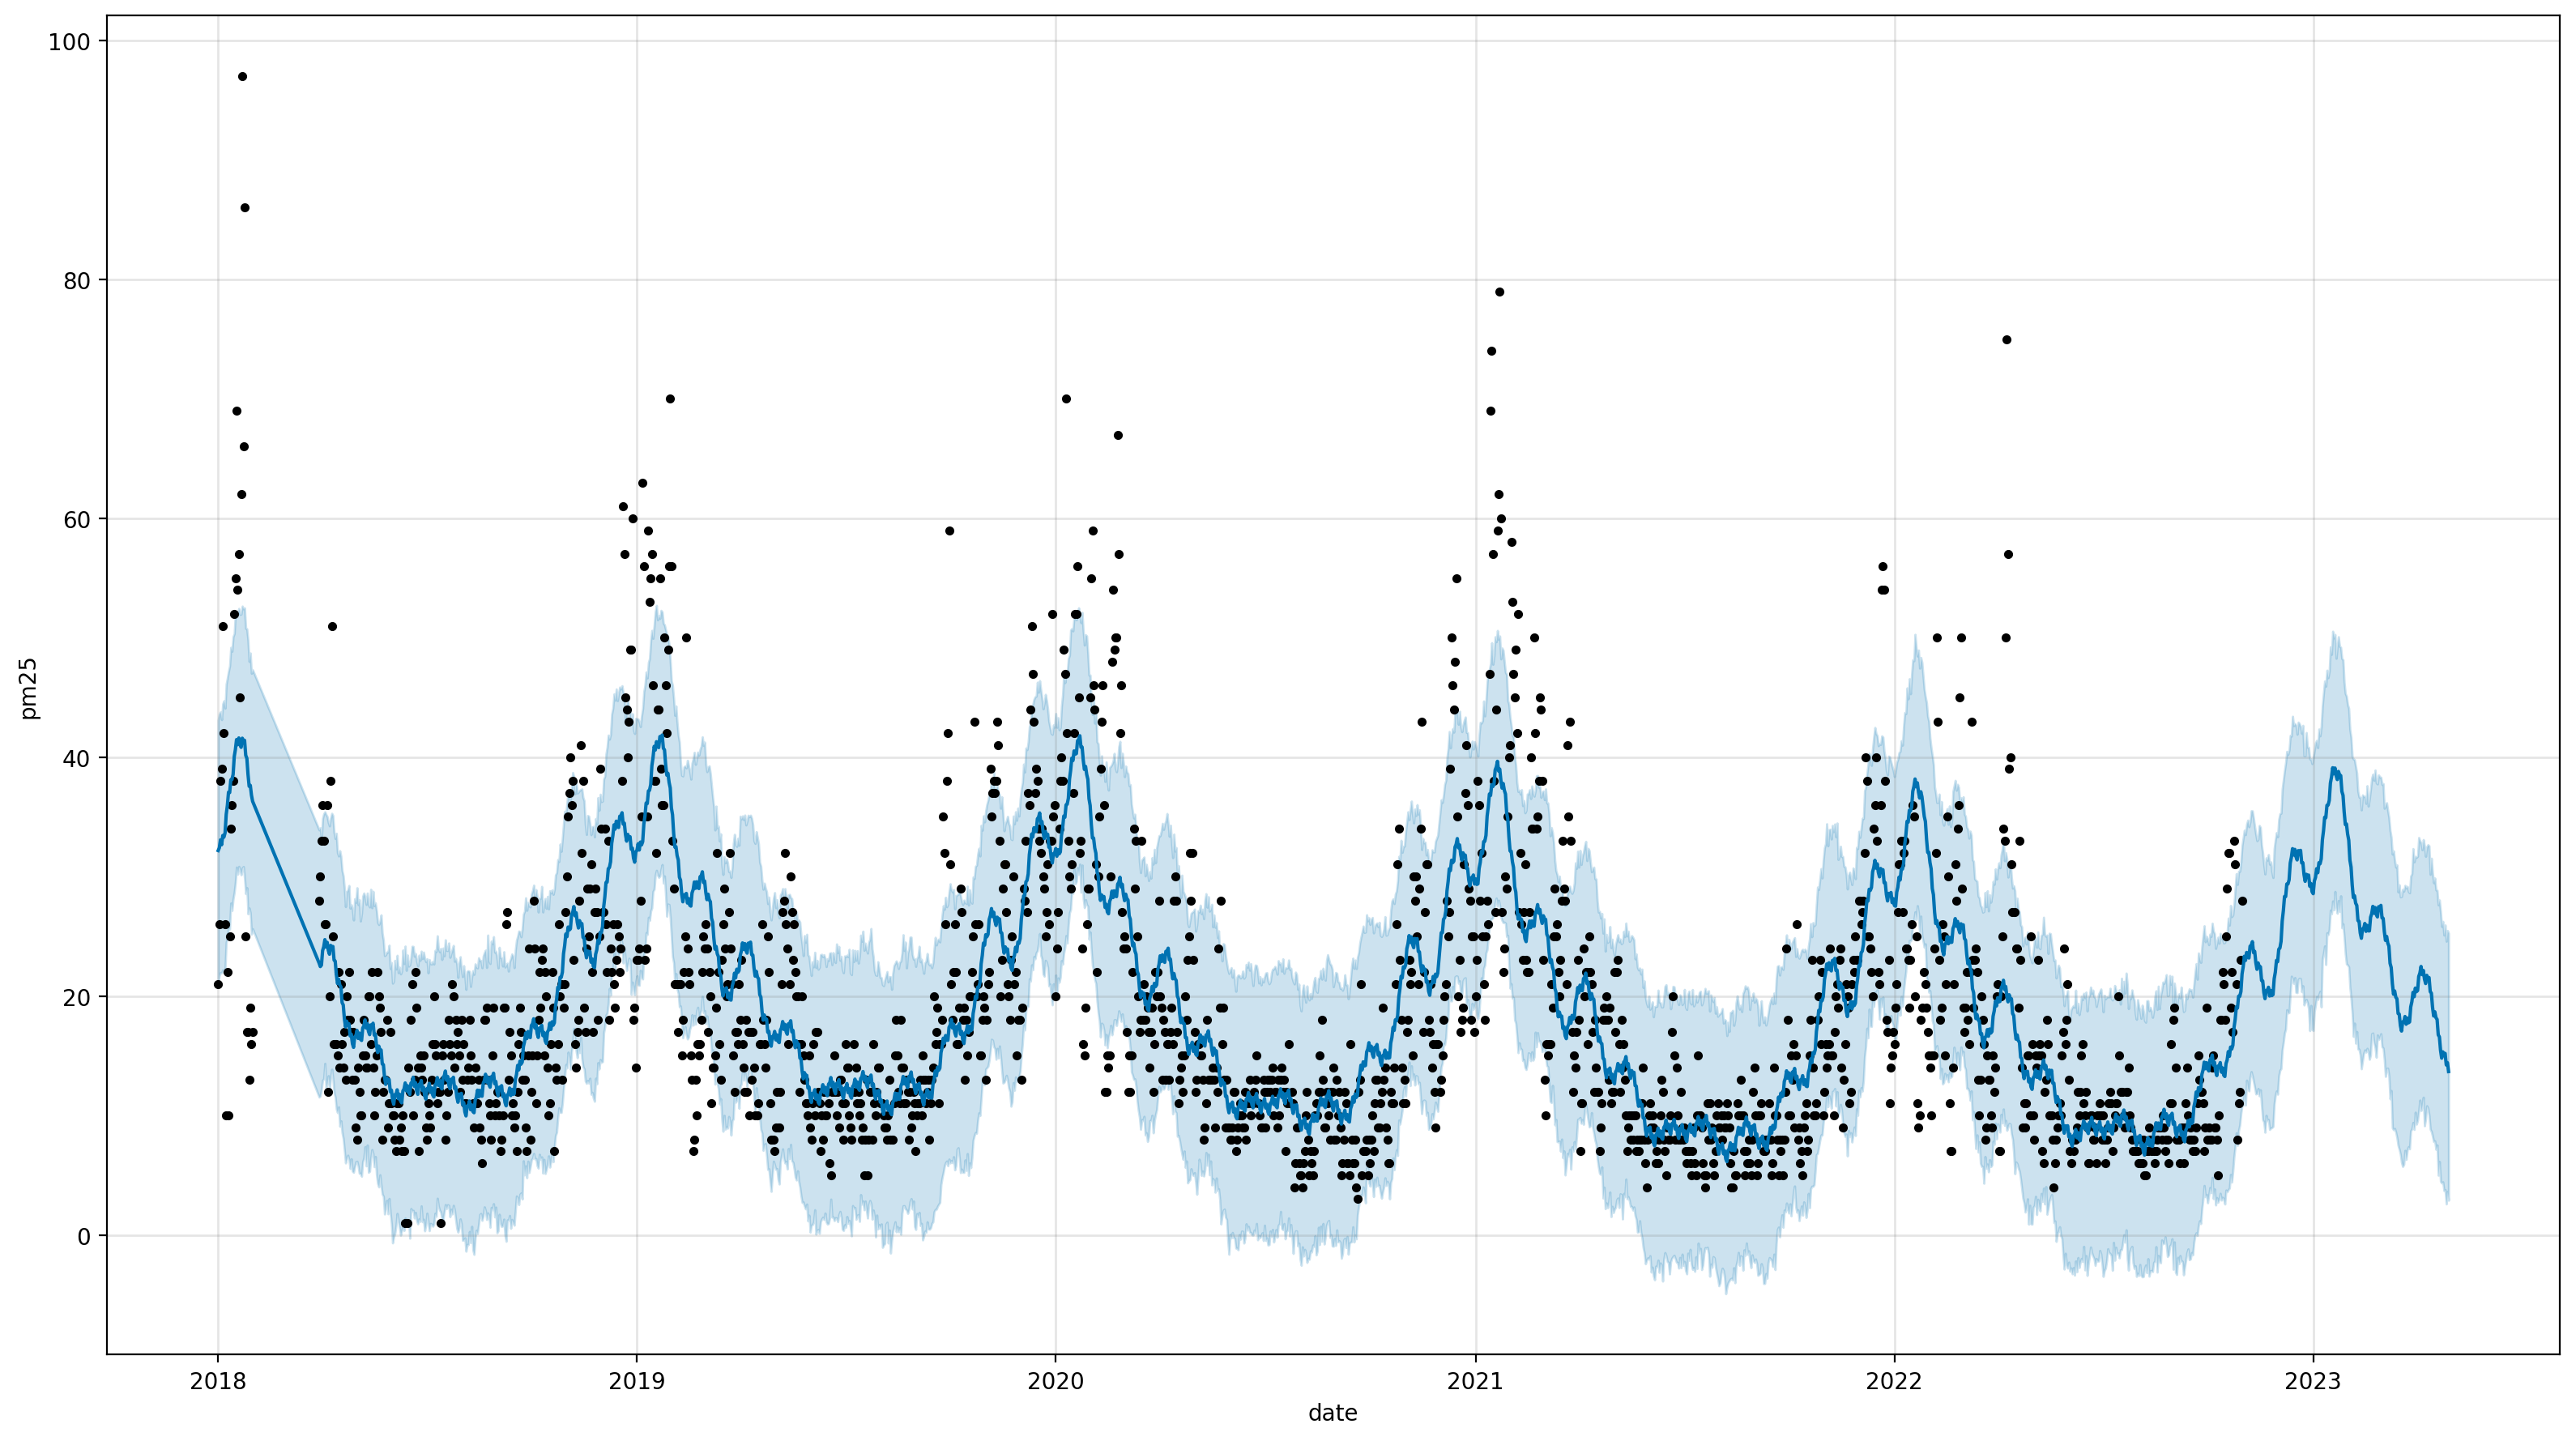

In [24]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel=y_col)

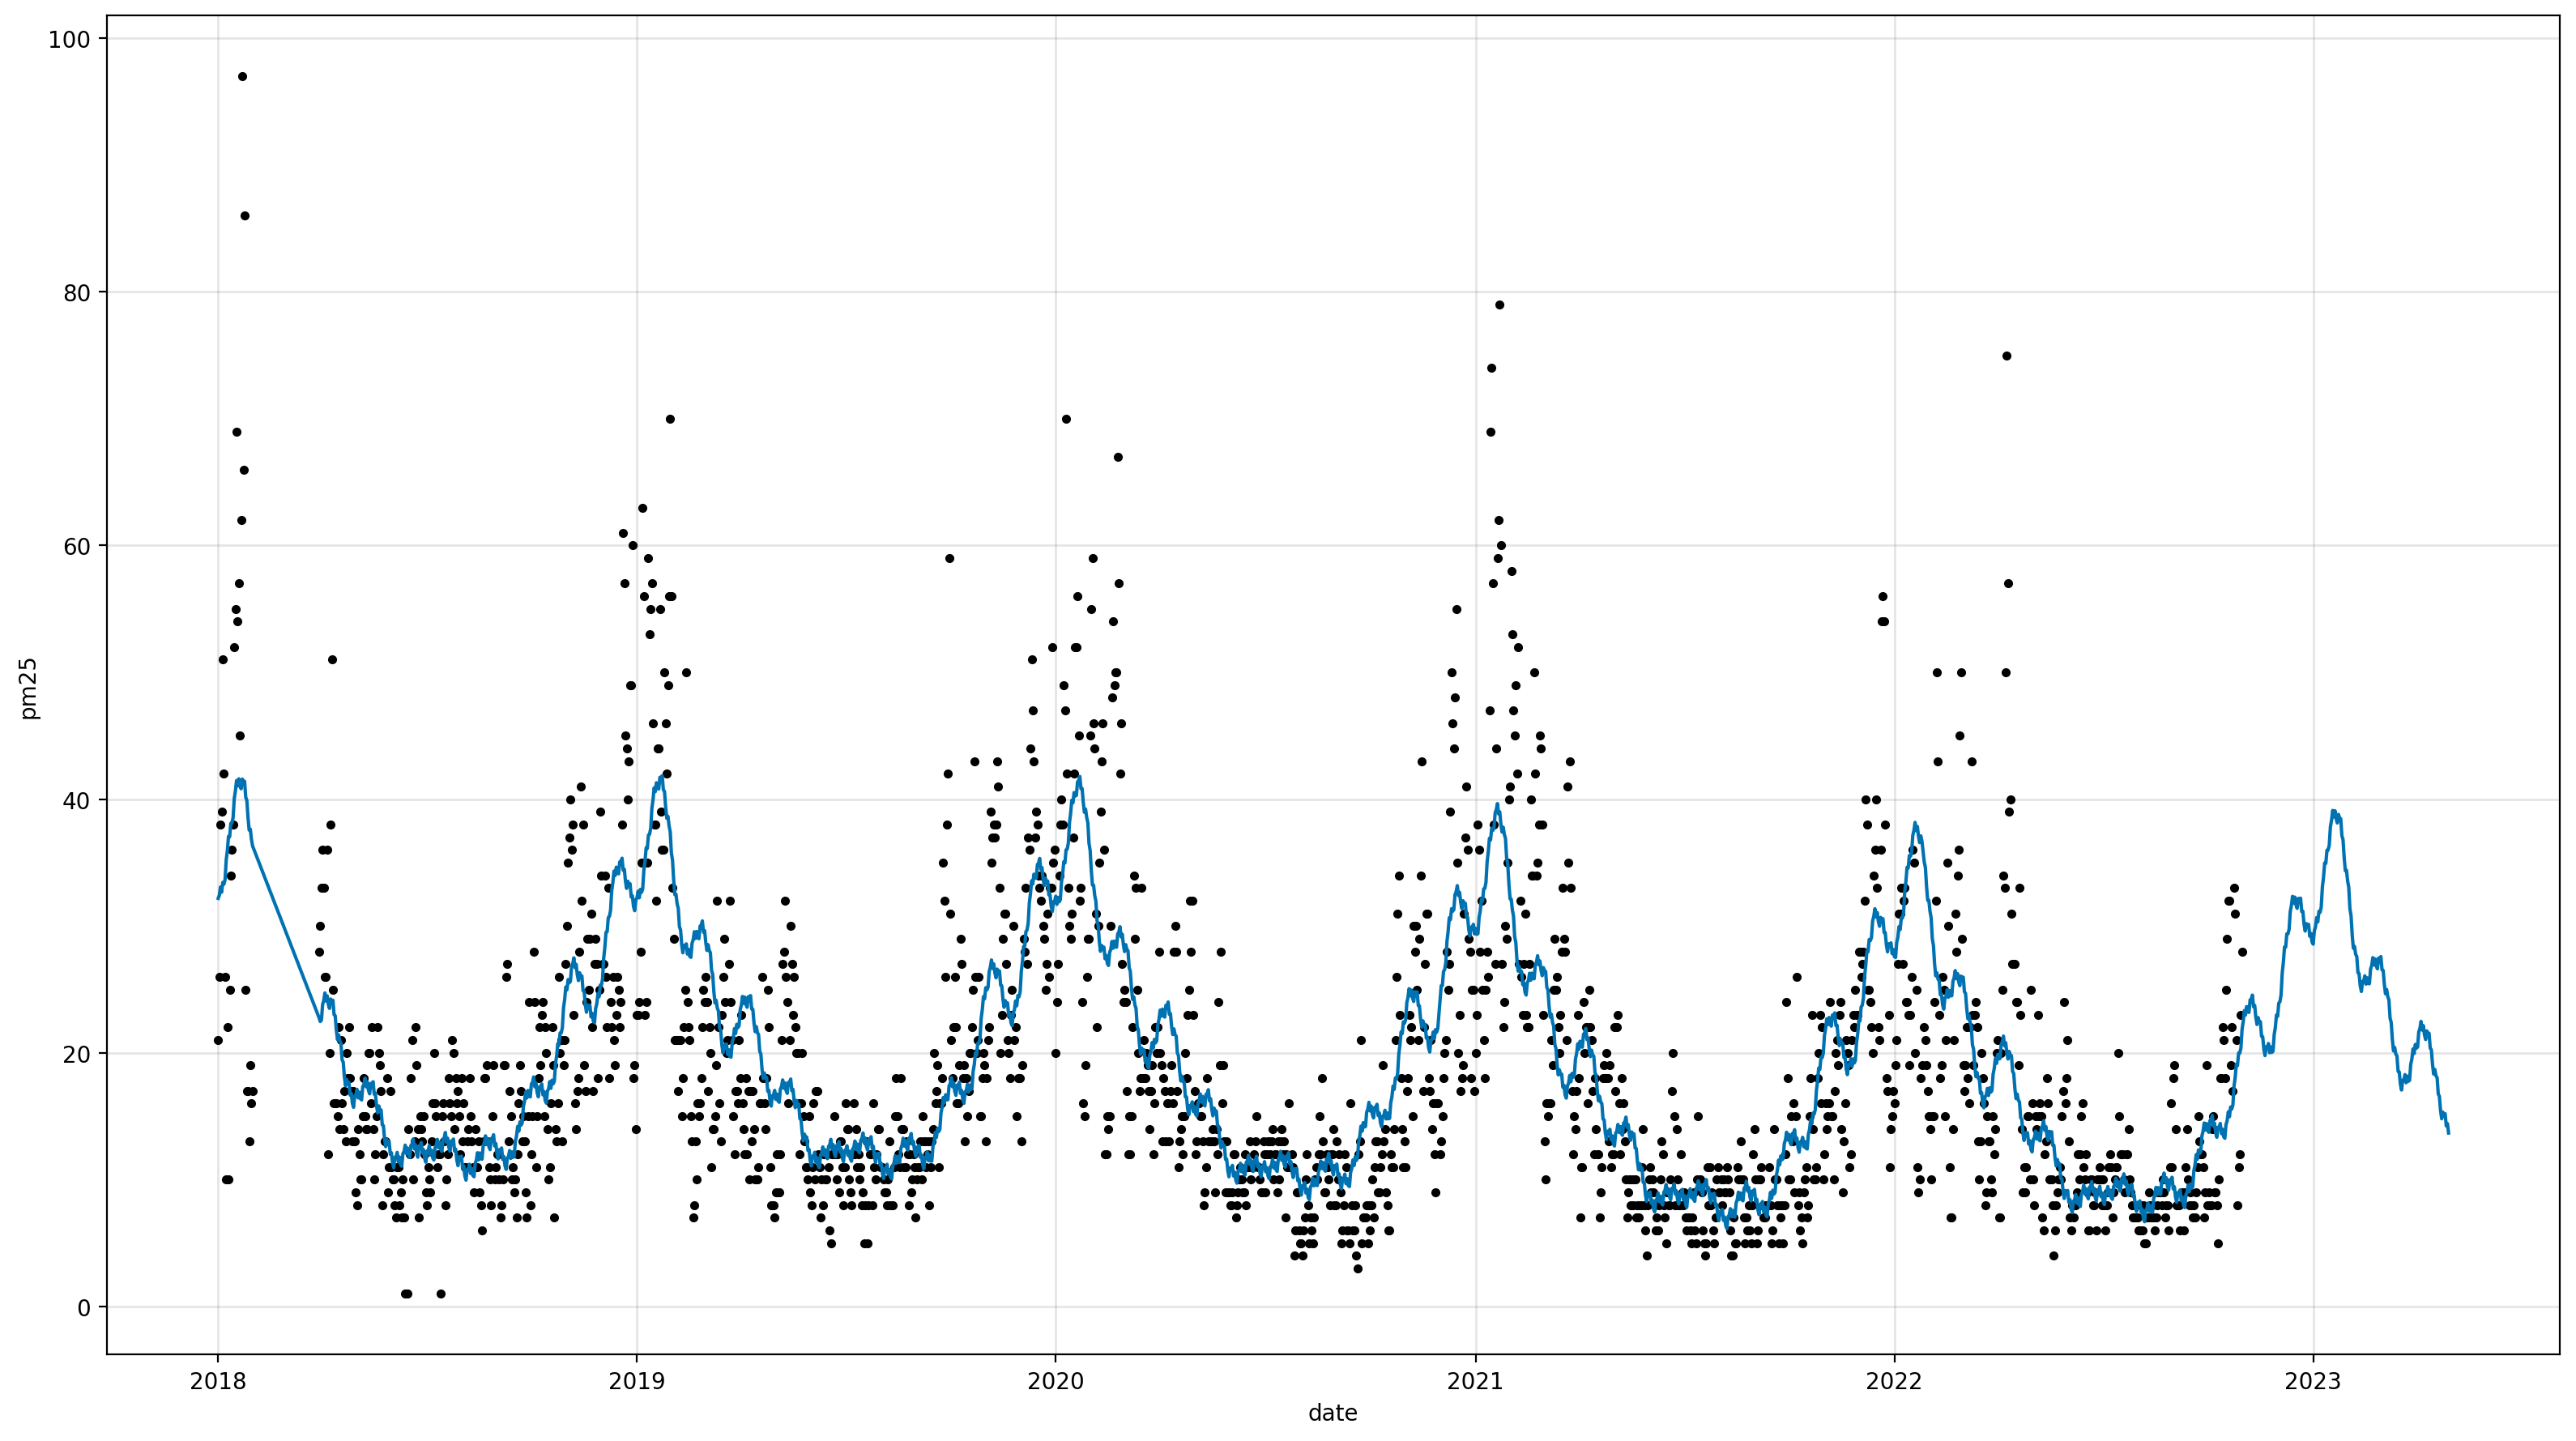

In [25]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [26]:
dfcstnew = forecast.tail(180)

In [27]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

,ds,yhat
1706,2022-11-01,22.455937
1707,2022-11-02,23.332704
1708,2022-11-03,22.980599
1709,2022-11-04,23.650254
1710,2022-11-05,23.247951
...,...,...
1881,2023-04-25,15.065846
1882,2023-04-26,15.201363
1883,2023-04-27,14.234972
1884,2023-04-28,14.424370


In [28]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0).head(7)
ypred

,ds,yhat
1706,2022-11-01,22.0
1707,2022-11-02,23.0
1708,2022-11-03,23.0
1709,2022-11-04,24.0
1710,2022-11-05,23.0
1711,2022-11-06,23.0
1712,2022-11-07,24.0


In [29]:
ypred.mean().round(0)

<ipython-input-29-2ab64095c772>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ypred.mean().round(0)


yhat    23.0
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [31]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [32]:
r2_score(metric_df.y, metric_df.yhat) #score

0.5176553853614829

In [33]:
mse = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse

72.98719474410544

In [34]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse) 
ans

8.543254341532004